In [16]:
import arxiv
from datetime import date, datetime
import datetime as dt
import re
import time

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date
import datetime as dt

In [3]:
year = 2020

#### Define the quarter periods

In [4]:

Q1 = {
    'start': dt.date(day=1, month=1, year=year),
    'end': dt.date(day=31, month=3, year=year)
}
Q2 = {
    'start': dt.date(day=1, month=4, year=year),
    'end': dt.date(day=30, month=6, year=year)
}
Q3 = {
    'start': dt.date(day=1, month=7, year=year),
    'end': dt.date(day=30, month=9, year=year)
}
Q4 = {
    'start': dt.date(day=1, month=10, year=year),
    'end': dt.date(day=31, month=12, year=year)
}

#### Set up lists to hold the id's for the papers and the dates

In [5]:
q1_papers = []
q2_papers = []
q3_papers = []
q4_papers = []
date_list = []

### Fetch the results for the different categories

In [6]:
def make_query(start):
    return(
    arxiv.query(
        query = 'cs.ai OR cs.cv OR cs.cl OR cs.lg OR cs.ro',
        start=start,
        max_results = None,
        max_chunk_results=3000,
        sort_by = 'submittedDate',
        sort_order = 'descending',
        iterative=True
    )
)

#### Iterate through the results.

In [7]:
sleep_time = 3
inyear = True
i = 0
while inyear:
    # Fetch a batch starting where we left off.
    results = make_query(i)
    
    for result in results():
        # Parse out the date.
        raw_date = result['published']
        date_match = re.search('\D*(\d+-\d+-\d+).*', raw_date)
        clean_date = date_match.group(1)
        date_obj = datetime.strptime(clean_date, '%Y-%m-%d').date()
        # Add the date to the date list.
        date_list.append(date_obj)

        # Bail if the date is before year
        if date < Q1['start']:
            print('breaking')
            inyear = False
            break

        # See which quarter we are in.
        if Q1['start'] <= date <= Q1['end']:
            q1_papers.append(result['id'])
        elif Q2['start'] <= date <= Q2['end']:
            q2_papers.append(result['id'])
        elif Q3['start'] <= date <= Q3['end']:
            q3_papers.append(result['id'])
        else:
            q4_papers.append(result['id'])
        
        # Increment the counter to the next result.
        i += 1
        
        # Let the user know our progress.
        if i%3000 == 0:
            print('Parsed through ', str(i))
            print('On date ', date)
    
    # Message that we are pausing.
    print('Pausing for ' + str(sleep_time) + ' seconds, Arxive needs a breather apparently.')
    time.sleep(sleep_time)
    sleep_time += 5

Parsed through  3000
On date  2020-08-04
Pausing for 3 seconds, Arxive needs a breather apparently.
Parsed through  6000
On date  2020-07-11
Parsed through  9000
On date  2020-06-19
Parsed through  12000
On date  2020-06-01
Parsed through  15000
On date  2020-05-06
Pausing for 8 seconds, Arxive needs a breather apparently.
Pausing for 13 seconds, Arxive needs a breather apparently.
Parsed through  18000
On date  2020-04-11
Parsed through  21000
On date  2020-03-16
Parsed through  24000
On date  2020-02-19
Pausing for 18 seconds, Arxive needs a breather apparently.
Parsed through  27000
On date  2020-01-19
Pausing for 23 seconds, Arxive needs a breather apparently.
Pausing for 28 seconds, Arxive needs a breather apparently.
breaking
Pausing for 33 seconds, Arxive needs a breather apparently.


In [8]:
len(q1_papers)

9025

In [9]:
len(q2_papers)

11777

In [10]:
len(q3_papers)

7491

In [11]:
len(q4_papers)

0

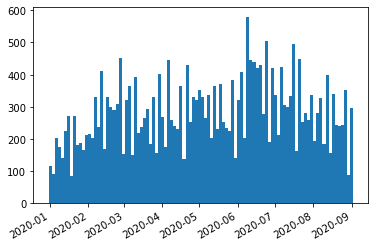

In [12]:
fig, ax = plt.subplots()
ax.hist(date_list, bins=100)

# rotate and align the tick labels so they look better
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')